# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

Read the colors.csv file in the data folder

In [39]:
colors = pd.read_csv('data/colors.csv')
colors.head()
colors.tail()
colors.columns

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')

How many different colours does the LEGO company produce?

In [31]:
colors.name.nunique()

135

how many of the LEGO colours are transparent?

The number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>

In [46]:
colors.groupby('is_trans').count().id

is_trans
f    107
t     28
Name: id, dtype: int64

In [44]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### **Understanding LEGO Themes vs. LEGO Sets**

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.


In [56]:
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [57]:
sets.tail()


,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [58]:
sets.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

In which year were the first LEGO sets released and what were these sets called?

In [68]:
sets.year.min()

1949

How many different sets did LEGO sell in their first year?

In [82]:
sets[sets.year == 1949].set_num.nunique()

5

The top 5 LEGO sets with the most number of parts. 

In [85]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


The number of LEGO sets released year-on-year.

In [136]:
sets_by_year = sets.groupby('year', as_index=False).count()
sets_by_year

,year,set_num,name,theme_id,num_parts
0,1949,5,5,5,5
1,1950,6,6,6,6
2,1953,4,4,4,4
3,1954,14,14,14,14
4,1955,28,28,28,28
...,...,...,...,...,...
66,2017,786,786,786,786
67,2018,816,816,816,816
68,2019,840,840,840,840
69,2020,674,674,674,674


How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [139]:
sets_by_year[sets_by_year['year']==1955].num_parts,sets_by_year[sets_by_year['year']==2019].num_parts

(4    28
 Name: num_parts, dtype: int64,
 68    840
 Name: num_parts, dtype: int64)

The number of LEGO releases chart 


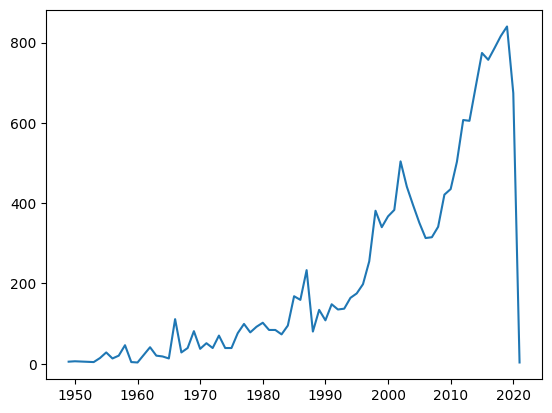

In [152]:
plt.plot(sets_by_year.year, sets_by_year.set_num)

Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart.(2020, 2021)

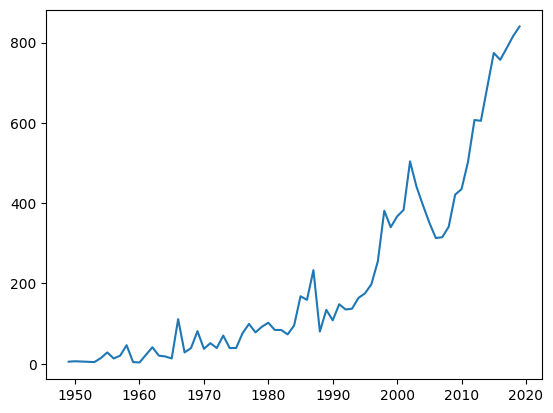

In [153]:
plt.plot(sets_by_year.year[:-2], sets_by_year.set_num[:-2])

The number of different themes shipped by year.

(1.   pandas.DataFrame.agg: Aggregate 
using one or more operations over the specified axis.
2.   pandas.Series.nunique: Return number of unique elements in the object.)

In [156]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


Rename Column in Dataframe

In [158]:
themes_by_year.rename(columns= {'theme_id': 'nr_themes'}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


The number of themes released by year chart.(i.e., exclude 2020 and 2021). 

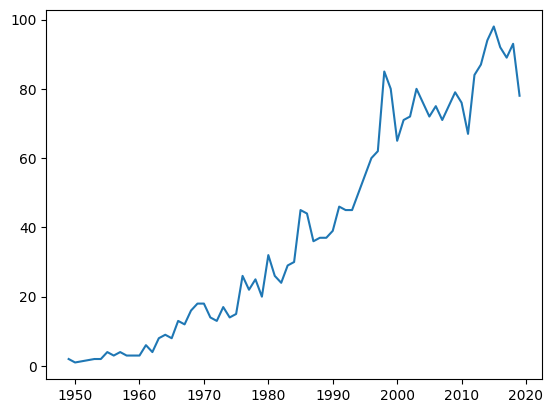

In [161]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

### Line Charts with Two Seperate Axes

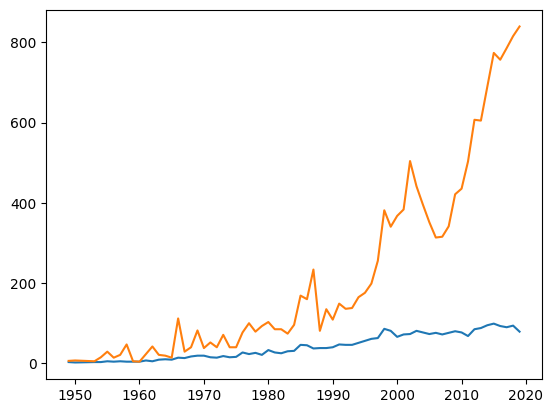

In [166]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.year[:-2], sets_by_year.set_num[:-2])

The problem is that the "number of themes" and the "number of sets" have very different scales. The theme number ranges between 0 and 90, while the number of sets ranges between 0 and 900.
<br>
We need to be able to configure and plot our data on two separate axes on the same chart.

Text(0, 0.5, 'Number of Themes')

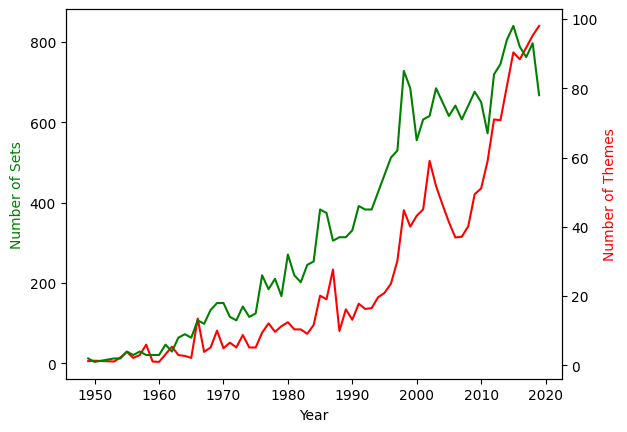

In [169]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='g')
ax1.plot(sets_by_year.year[:-2], sets_by_year.set_num[:-2], color='r')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='red')

How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [174]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plots in Matplotlib

Has the size and complexity of LEGO sets increased over time based on the number of parts?

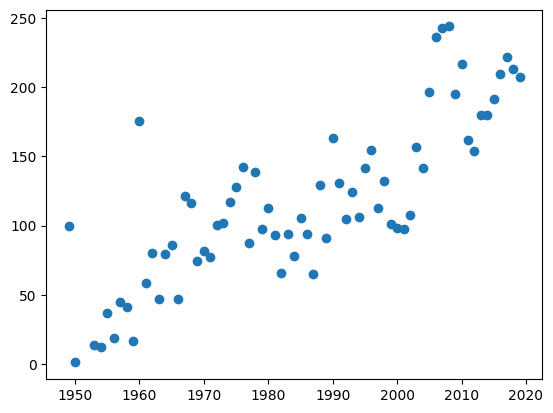

In [177]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [217]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:1]

158    753
Name: theme_id, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png">

In [201]:
themes = pd.read_csv('data/themes.csv')
themes.columns

Index(['id', 'name', 'parent_id'], dtype='object')

In [202]:
themes[themes['id']==158]

,id,name,parent_id
150,158,Star Wars,NaN


How many ids correspond to the 'Star Wars' name in the themes.csv?

In [203]:
themes[themes['name']=="Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [204]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [205]:
sets[sets.theme_id == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [206]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [207]:
sets[sets.theme_id == 261]

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


### Merging (i.e., Combining) DataFrames based on a Key


In [218]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index,
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [220]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


<BarContainer object of 10 artists>

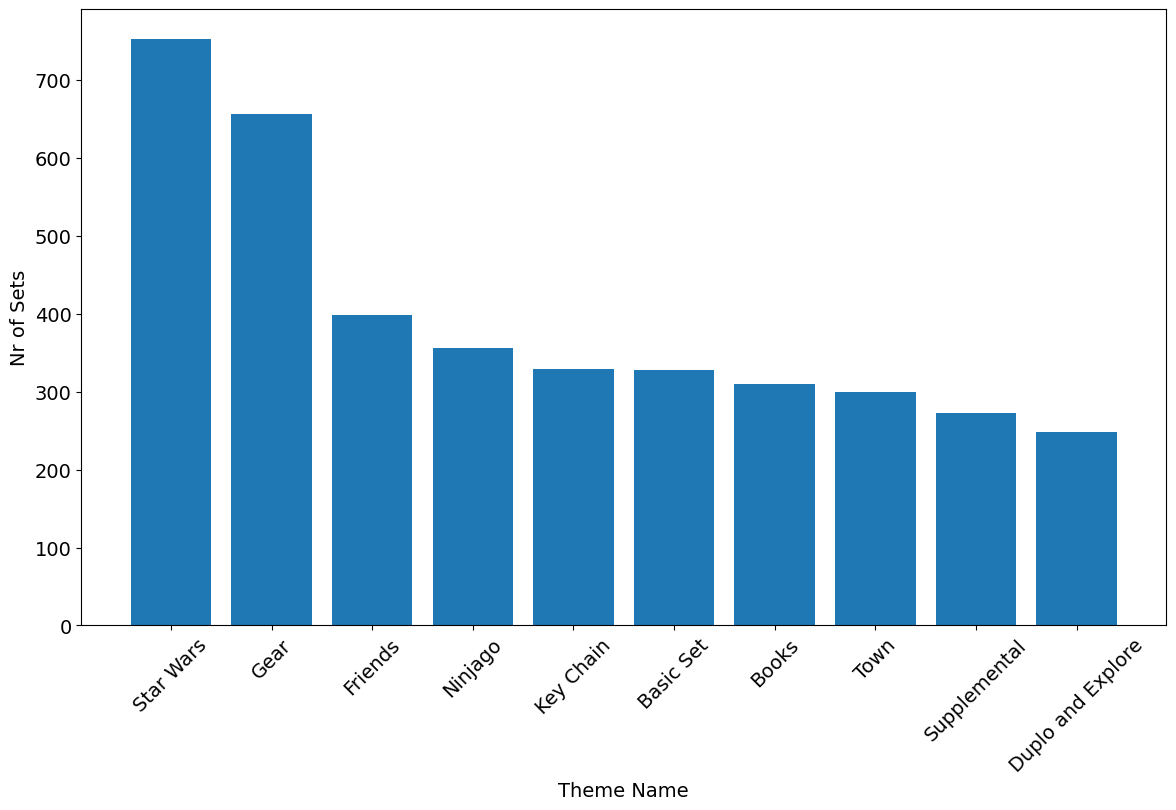

In [222]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])